In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00492/Metro_Interstate_Traffic_Volume.csv.gz"
traffic = pd.read_csv(url)

# Display first 5 rows
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [2]:
traffic.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [3]:
traffic.describe()  

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


In [4]:
traffic.isnull().sum()  

holiday                48143
temp                       0
rain_1h                    0
snow_1h                    0
clouds_all                 0
weather_main               0
weather_description        0
date_time                  0
traffic_volume             0
dtype: int64

In [6]:

traffic['date_time'] = pd.to_datetime(traffic['date_time'])


traffic['hour'] = traffic['date_time'].dt.hour
traffic['day_of_week'] = traffic['date_time'].dt.dayofweek  # 0=Monday, 6=Sunday
traffic['month'] = traffic['date_time'].dt.month

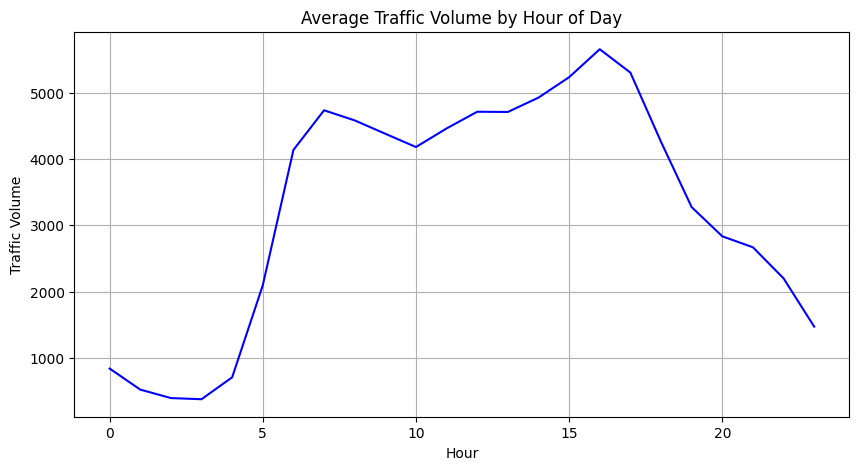

In [7]:
plt.figure(figsize=(10, 5))
traffic.groupby('hour')['traffic_volume'].mean().plot(color='blue')
plt.title("Average Traffic Volume by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Traffic Volume")
plt.grid()
plt.show()

<Figure size 1000x500 with 0 Axes>

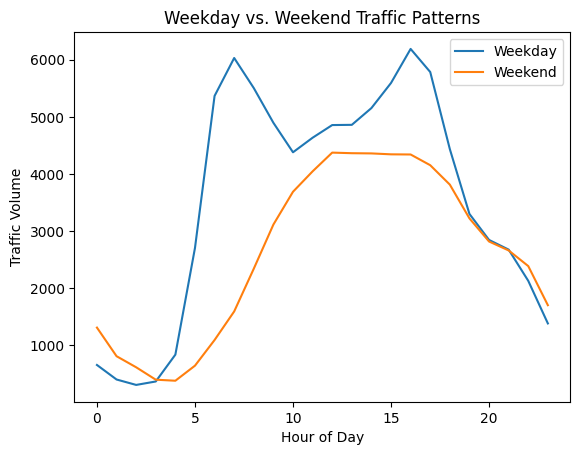

In [8]:

traffic['is_weekend'] = traffic['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)


plt.figure(figsize=(10, 5))
traffic.groupby(['is_weekend', 'hour'])['traffic_volume'].mean().unstack(0).plot()
plt.title("Weekday vs. Weekend Traffic Patterns")
plt.xlabel("Hour of Day")
plt.ylabel("Traffic Volume")
plt.legend(["Weekday", "Weekend"])
plt.show()

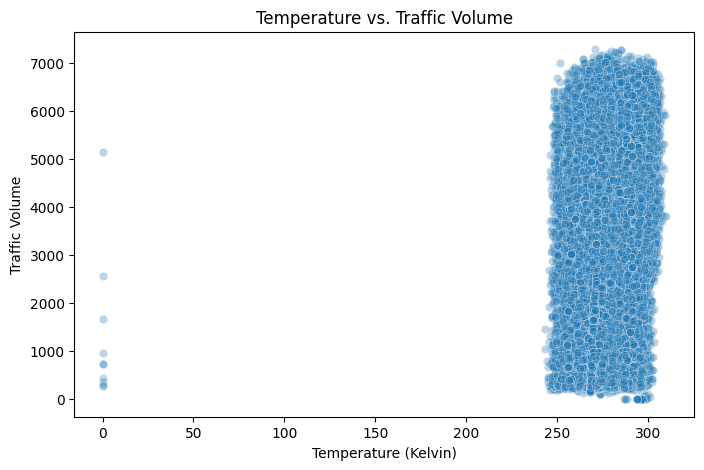

In [9]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='temp', y='traffic_volume', data=traffic, alpha=0.3)
plt.title("Temperature vs. Traffic Volume")
plt.xlabel("Temperature (Kelvin)")
plt.ylabel("Traffic Volume")
plt.show()

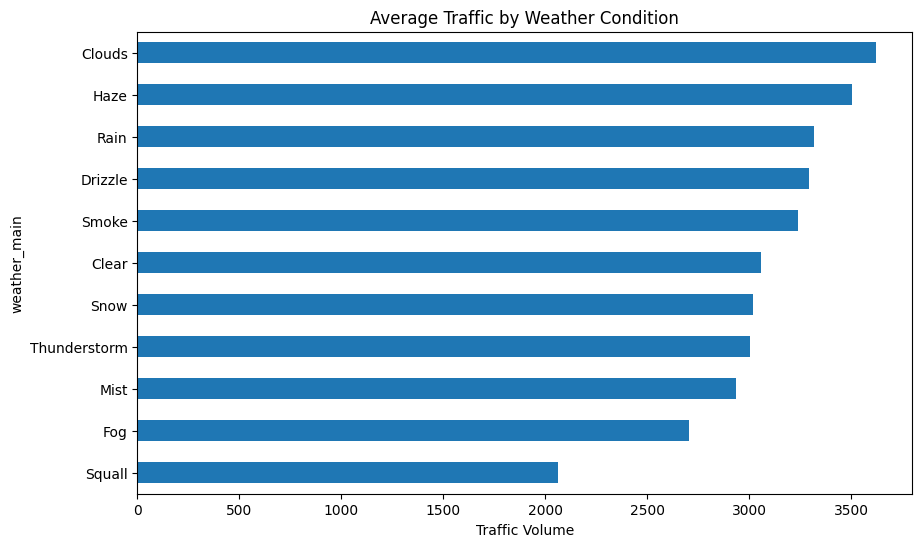

In [10]:
plt.figure(figsize=(10, 6))
traffic.groupby('weather_main')['traffic_volume'].mean().sort_values().plot(kind='barh')
plt.title("Average Traffic by Weather Condition")
plt.xlabel("Traffic Volume")
plt.show()